# Sets (basics)

In [1]:
# Define a set A, containing a few integer numbers.
A = Set([1,2,3,4])

In [2]:
# Define another set B, containing a few integer numbers.
B = Set([1,3])

In [3]:
# Check if B is a subset of set A.
B.issubset(A)

True

In [4]:
# The union of set A and set B equals:
A.union(B)

{1, 2, 3, 4}

In [5]:
# The intersection of set A and set B equals:
A.intersection(B)

{1, 3}

In [6]:
# The difference A - B equals:
A.difference(B)

{2, 4}

In [7]:
# The difference B - A equals:
B.difference(A)

{}

In [8]:
# Check if list elements are unique
a,c=var('a,c')
lst=[1,2,a,c,4,3,7];lst

[1, 2, a, c, 4, 3, 7]

In [9]:
slst=set(lst);slst

{1, 2, 3, 4, a, 7, c}

In [10]:
len(lst)==len(slst)

True

In [11]:
w=[a,3,1,a,1];w

[a, 3, 1, a, 1]

In [12]:
len(w)==len(set(w))

False

# Simulations

# Simulation 1: The sum of two fair dice

In [13]:
events=[randint(1,6)+randint(1,6) for i in range(1000000)]

In [14]:
#The probalitity that the sum equals 7
float(events.count(7))/float(len(events))

0.166612

In [15]:
n(1/6.,digits=3)

0.167

# Simulation 2: Calculate $\pi$

The number 𝜋 is a mathematical constant. Originally defined as the ratio of a circle's circumference to its diameter, it now has various equivalent definitions and appears in many formulas in all areas of mathematics and physics.

Being an irrational number, 𝜋 cannot be expressed as a common fraction (equivalently, its decimal representation never ends and never settles into a permanently repeating pattern).

However, there is a simple process that can approximate its value that is based on from the law of large number:

    - Let's imagine a square dartboard with a circle drawn inside it touching all its sides.

    - We then start trhowing darts randoly at it. That means some fall inside the circle, and some outside.

    - Let's also ut assume that no dart falls outside that board.

    - At the end of your dart throwing session, you count the fraction of darts that fell inside the circle of the total number of darts thrown.

    - Multiply that number by 4.

The resulting number should be 𝜋, or a close approximation if you had thrown a lot of darts.

We can investigate after how many random throws that approximation is good enough.

In [16]:
def myran():
    return 2.*random()-1.

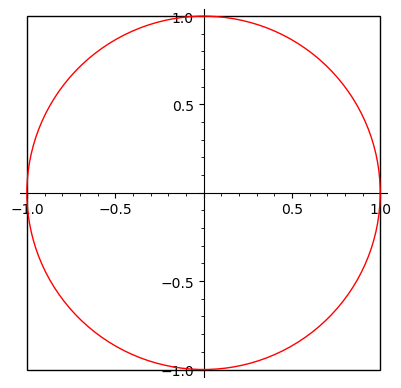

In [17]:
g=circle([0,0],1,color="red")+polygon([[-1,-1],[-1,1],[1,1],[1,-1]],fill=False,color="black");g

In [18]:
numdarts=100000
sample=[[myran(),myran()] for i in range(numdarts)]
ni=0.
for poi in sample:
    x,y=poi
    if(x^2+y^2<1):
        ni+=1.
4.*ni/float(len(sample))

3.14160000000000

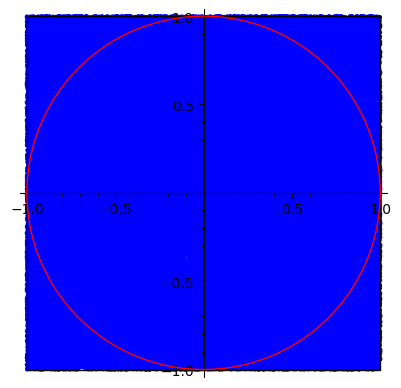

In [19]:
g+points(sample)

In [20]:
def calcpi(npoints):
    ni=0.
    for i in range(npoints):
        x,y=myran(),myran()
        if(x^2+y^2<1):
            ni+=1.
    return 4.*ni/float(npoints)
        

In [21]:
calcpi(10000)

3.13000000000000

In [22]:
calcpi(100000)

3.14136000000000

# Simulation 3: The base rate fallacy 

In [23]:
# Assign disease randomly with probability 0.5%
def disease():
    if(random() <= 0.005):
        return +1
    else:
        return -1

In [24]:
# Assign test results randomly according to given 
# conditional probabilities.
def test(infected):
    r = random()
    if(infected == -1):
        if(r <= 0.05):
            return +1 # false positive
        else:
            return -1
    else:
        if(r < 0.1):
            return -1 # false negative
        else:
            return +1

In [25]:
# Create a random sample of 300000 people: +1 infected , -1 not infected
people=[disease() for x in range(300000)]

# Assign random test results to the above people
peopleΤested = [[x,test(x)] for x in people]

# The probability of being infected while tested positive
peopleΤested.count([+1,+1])/(peopleΤested.count([-1,+1]) + peopleΤested.count([+1,+1]))

0.08562484655045421

# Binomial distribution

In [26]:
# Import the binomial function from scipy.stats.
from scipy.stats import binom

In [27]:
# Create a binomial distribution of 10 events with probability 0.5
binom_dist = binom(10, 0.5)

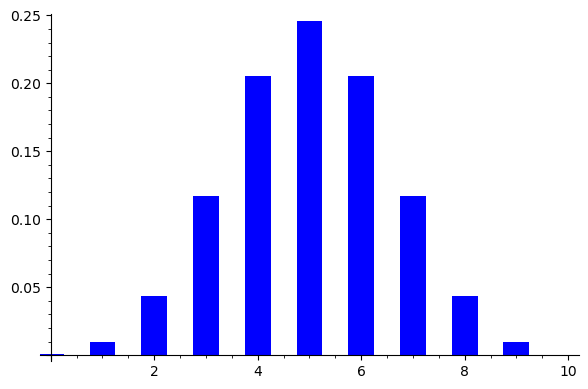

In [28]:
# Plot a bar chart of the probability mass function of the distribution.
bar_chart([binom_dist.pmf(k) for k in range(10)])

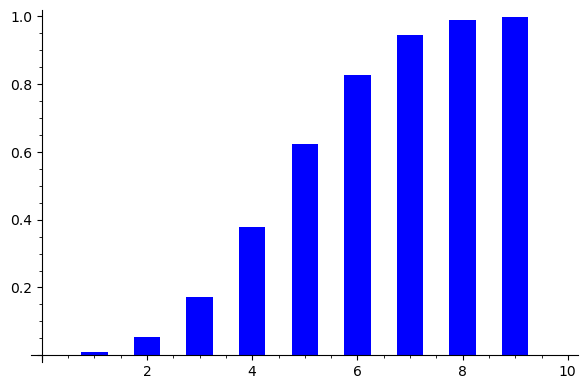

In [29]:
bar_chart([binom_dist.cdf(k) for k in range(10)])

# Gaussian distribution

In [30]:
import numpy as np
from matplotlib import pyplot as plt 

In [31]:
# Create a random sample of "nOfSamples" numbers using a gaussian distribution
# with mean = mu and standard deviation = sigma.
mu, sigma, nOfSamples = 4, 0.5, 10000
gaussianValues = np.random.normal(mu, sigma, nOfSamples)

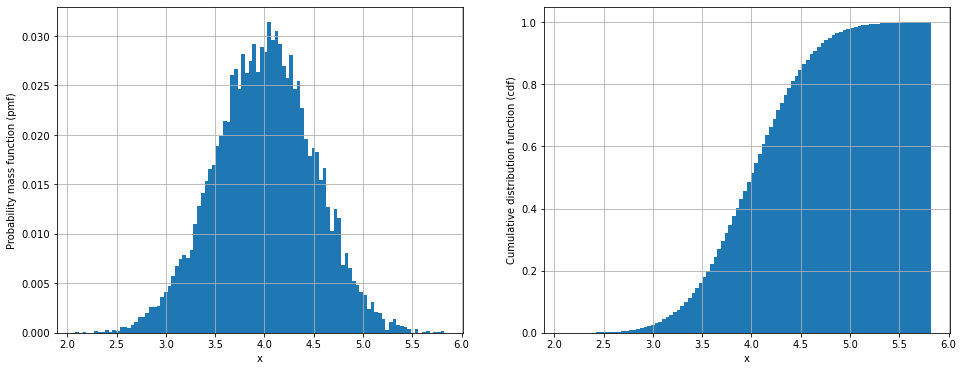

In [32]:
# Create a histogram from the sampled values.
counts, bins = np.histogram(gaussianValues, bins = 100)

# Plot the histogram.
fig, ax = plt.subplots(1, 2, figsize = (16,6) )

# Plot the pmf.
ax[0].hist(bins[:-1], bins, weights=counts/nOfSamples, cumulative = False)
ax[0].set_ylabel("Probability mass function (pmf)")
ax[0].set_xlabel("x")
ax[0].grid()

# Turn on the cumulative plot to get the cdf.
ax[1].hist(bins[:-1], bins, weights=counts/nOfSamples, cumulative = True)
ax[1].set_ylabel("Cumulative distribution function (cdf)")
ax[1].set_xlabel("x")
ax[1].grid()

plt.show()

# Mean, Covariance and Correlation

In [35]:
data=[randint(1,10) for i in range(10)];
data

[2, 4, 1, 1, 10, 6, 7, 10, 7, 7]

In [37]:
# This is the mean values
μ=sum(data)/len(data);μ

5.5

In [38]:
vv=[(data[i]-μ)^2  for i in range(10)];vv

[12.25, 2.25, 20.25, 20.25, 20.25, 0.25, 2.25, 20.25, 2.25, 2.25]

In [39]:
# This is the variance
v=sum(vv)/len(vv);v

10.25

In [40]:
# and the standard deviation
σ=sqrt(v);σ

3.2015621187164243

## Example 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

In [ ]:
nop=100
# Create data along the line y = 2 x  adding some gaussian random noise around each value.
x0 = np.linspace(0,10,1001)
x= x0 + 0.5*np.random.normal(x0, 5)
y= 2*x0 + 0.5*np.random.normal(x, 10)

array([-3.34711637, -1.73708743,  2.12805528, ..., 34.21658424,
       19.61107091, 25.54958056])

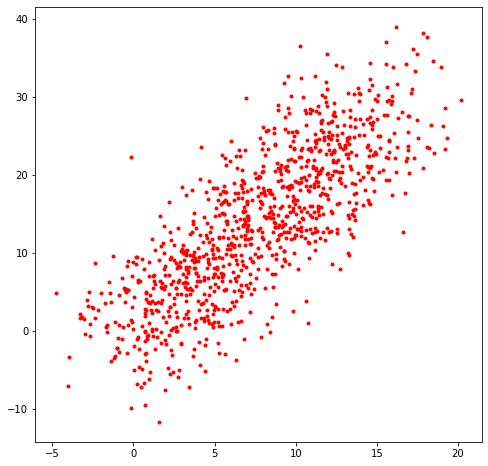

In [ ]:
fig = plt.figure( figsize = (8,8) )
plt.plot(x, y,"r.")
plt.show()

In [ ]:
# Calculate the mean and standard deviation of each set of data.
mux, stdx = np.mean(x), np.std(x)
print(mux, stdx)

7.604766181007993 4.951814281883819


In [ ]:
muy, stdy = np.mean(y), np.std(y)
print(muy, stdy)

13.708037503444796 9.524278623547016


In [ ]:
# Calculate the covariance.
covariance = np.mean((x - mux)*(y - muy))

In [ ]:
# Calculate the correlation.
correlation = covariance/(stdx*stdy)
print(correlation)

0.7896176254972348


This is close to 1. Which means that the two variables are positively correlated.

## Example 2

In [ ]:
nop=1000
x= np.random.uniform(low=0.,high=20., size=nop)
y= np.random.uniform(low=0.,high=20., size=nop) 

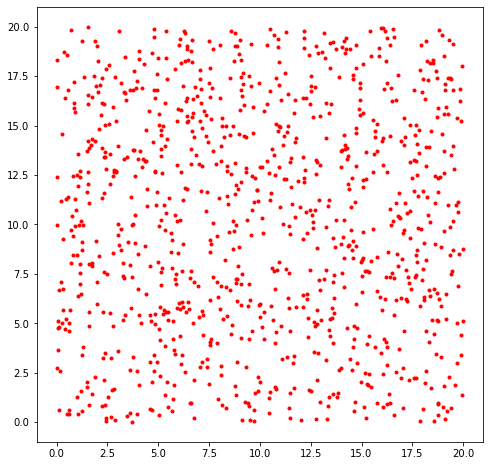

In [ ]:
fig = plt.figure( figsize = (8,8) )
plt.plot(x, y,"r.")
plt.show()

In [ ]:
# Calculate the mean and standard deviation of each set of data.
mux, stdx = np.mean(x), np.std(x)
print(mux, stdx)

9.995817449925548 5.803959490343458


In [ ]:
muy, stdy = np.mean(y), np.std(y)
print(muy, stdy)

10.144908500291223 5.701837650466195


In [ ]:
# Calculate the covariance.
covariance = np.mean((x - mux)*(y - muy));

In [ ]:
# Calculate the correlation.
correlation = covariance/(stdx*stdy)
print(correlation)

0.0036928314674184643


Random data. No corellation.